In [33]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import plotnine as p9

In [34]:
sf_crime = pd.read_csv("../clean_data/sf_crime.csv")
sf_unemployment = pd.read_csv("../clean_data/sf_unemployment.csv")
sf_crime = sf_crime.drop(["Unnamed: 0"], axis= 1)
sf_unemployment = sf_unemployment.drop(["Unnamed: 0"], axis= 1)


In [35]:
sf_crime = sf_crime.merge(sf_unemployment, how = "left", on="year")

In [36]:
sf_crime["unemployment_rate"] = sf_crime["unemployment average"]/sf_crime["population"]
sf_crime

,city,population,violent crime,murder and nonnegligent manslaughter,rape,robbery,aggravated assault,property crime,burglary,larceny-theft,motor vehicle theft,arson,state,year,violent_rate,property_rate,total_rate,unemployment average,unemployment_rate
0,San Francisco,764693.0,5323.0,55.0,308.0,2371.0,2589.0,47759.0,5947.0,35530.0,6282.0,344.0,California,2022,0.006961,0.062455,0.069416,14599.833333,0.019092
1,San Francisco,881514.0,4796.0,48.0,198.0,2388.0,2162.0,38737.0,7452.0,25319.0,5966.0,377.0,California,2020,0.005441,0.043944,0.049384,44465.583333,0.050442
2,San Francisco,886007.0,5933.0,40.0,324.0,3055.0,2514.0,48780.0,4644.0,39887.0,4249.0,275.0,California,2019,0.006696,0.055056,0.061752,12865.083333,0.014520
3,San Francisco,889282.0,6144.0,46.0,354.0,3165.0,2579.0,49214.0,5322.0,39675.0,4217.0,288.0,California,2018,0.006909,0.055341,0.062250,13639.416667,0.015338
4,San Francisco,881255.0,6301.0,56.0,367.0,3220.0,2658.0,54356.0,4935.0,44587.0,4834.0,303.0,California,2017,0.007150,0.061680,0.068830,16606.000000,0.018844
5,San Francisco,871155.0,6190.0,57.0,342.0,3175.0,2616.0,47402.0,4978.0,36991.0,5433.0,255.0,California,2016,0.007106,0.054413,0.061518,18344.416667,0.021058
6,San Francisco,863782.0,6710.0,53.0,344.0,3610.0,2703.0,53019.0,5186.0,40918.0,6915.0,272.0,California,2015,0.007768,0.061380,0.069148,19844.500000,0.022974
7,San Francisco,850294.0,6761.0,45.0,355.0,3224.0,3137.0,45093.0,5237.0,33730.0,6126.0,241.0,California,2014,0.007951,0.053032,0.060984,23335.666667,0.027444
8,San Francisco,833863.0,7064.0,48.0,161.0,4202.0,2653.0,48324.0,5931.0,36527.0,5866.0,227.0,California,2013,0.008471,0.057952,0.066423,28430.250000,0.034095
9,San Francisco,820363.0,5777.0,69.0,108.0,3484.0,2116.0,38898.0,5317.0,28242.0,5339.0,207.0,California,2012,0.007042,0.047416,0.054458,34978.333333,0.042638


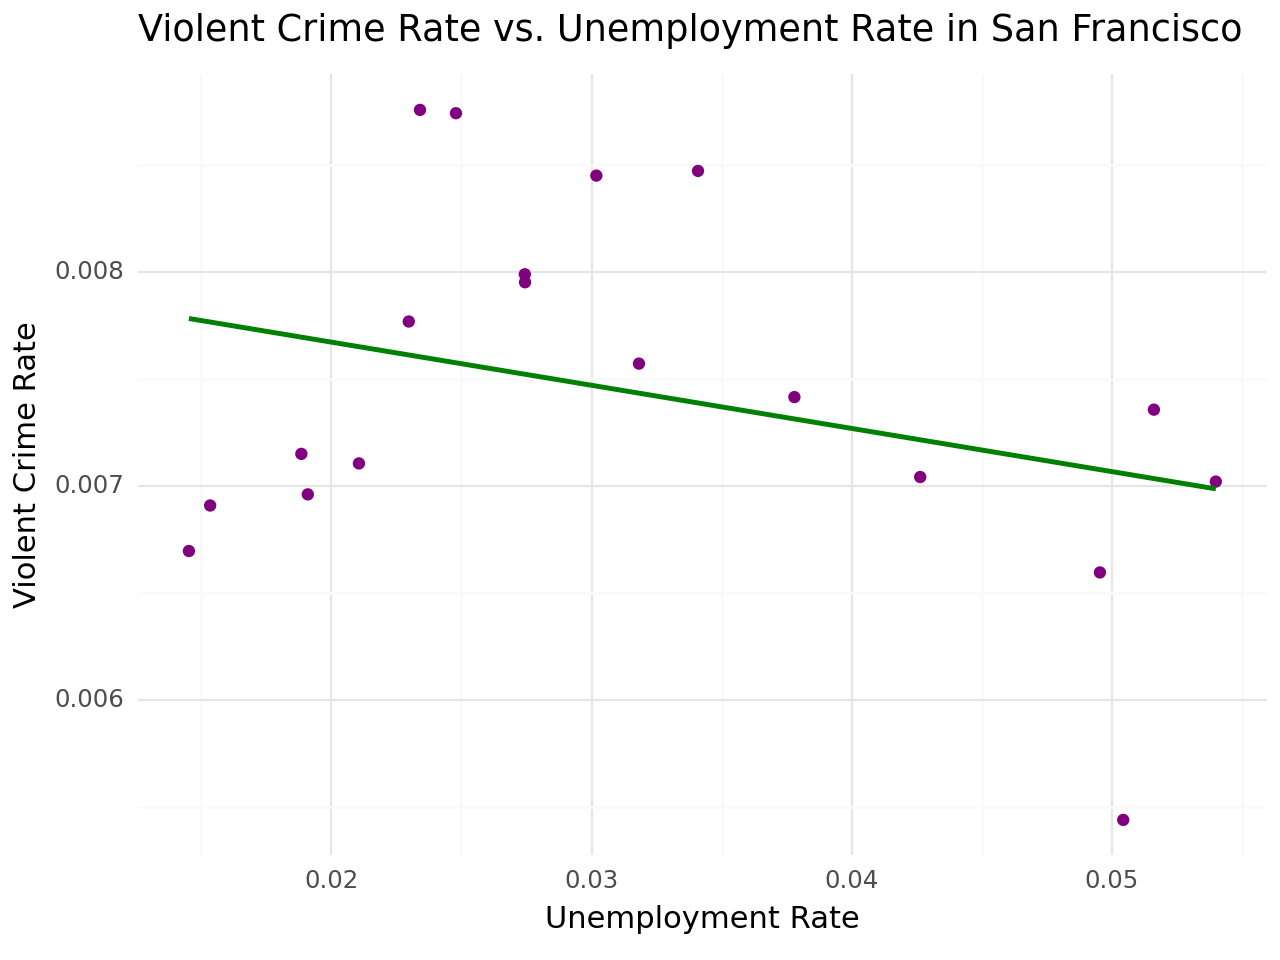

<Figure Size: (640 x 480)>

In [37]:
unemployment_graph_violent = (
    p9.ggplot(sf_crime, p9.aes(x = "unemployment_rate", y = "violent_rate")) + p9.geom_point(color = "purple")
    + p9.geom_smooth(method = "lm", se = False, color = "green") + p9.theme_minimal() +
    p9.labs(x = "Unemployment Rate",
            y = "Violent Crime Rate",
            title = "Violent Crime Rate vs. Unemployment Rate in San Francisco")
)
unemployment_graph_violent

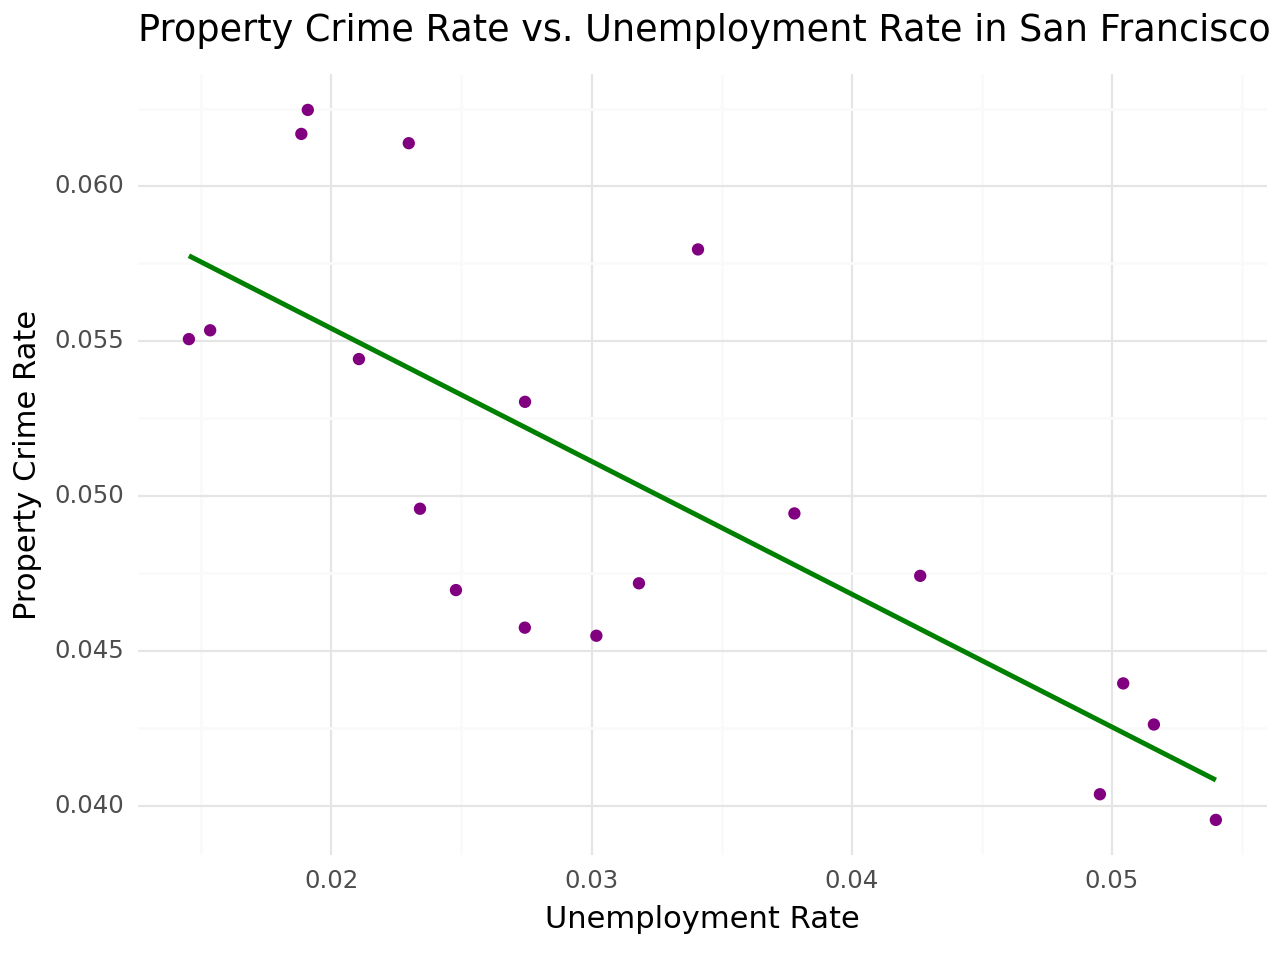

<Figure Size: (640 x 480)>

In [38]:
unemployment_graph_property = (
    p9.ggplot(sf_crime, p9.aes(x = "unemployment_rate", y = "property_rate")) + p9.geom_point(color = "purple")
    + p9.geom_smooth(method = "lm", se = False, color = "green") + p9.theme_minimal() +
    p9.labs(x = "Unemployment Rate",
            y = "Property Crime Rate",
            title = "Property Crime Rate vs. Unemployment Rate in San Francisco")
)
unemployment_graph_property

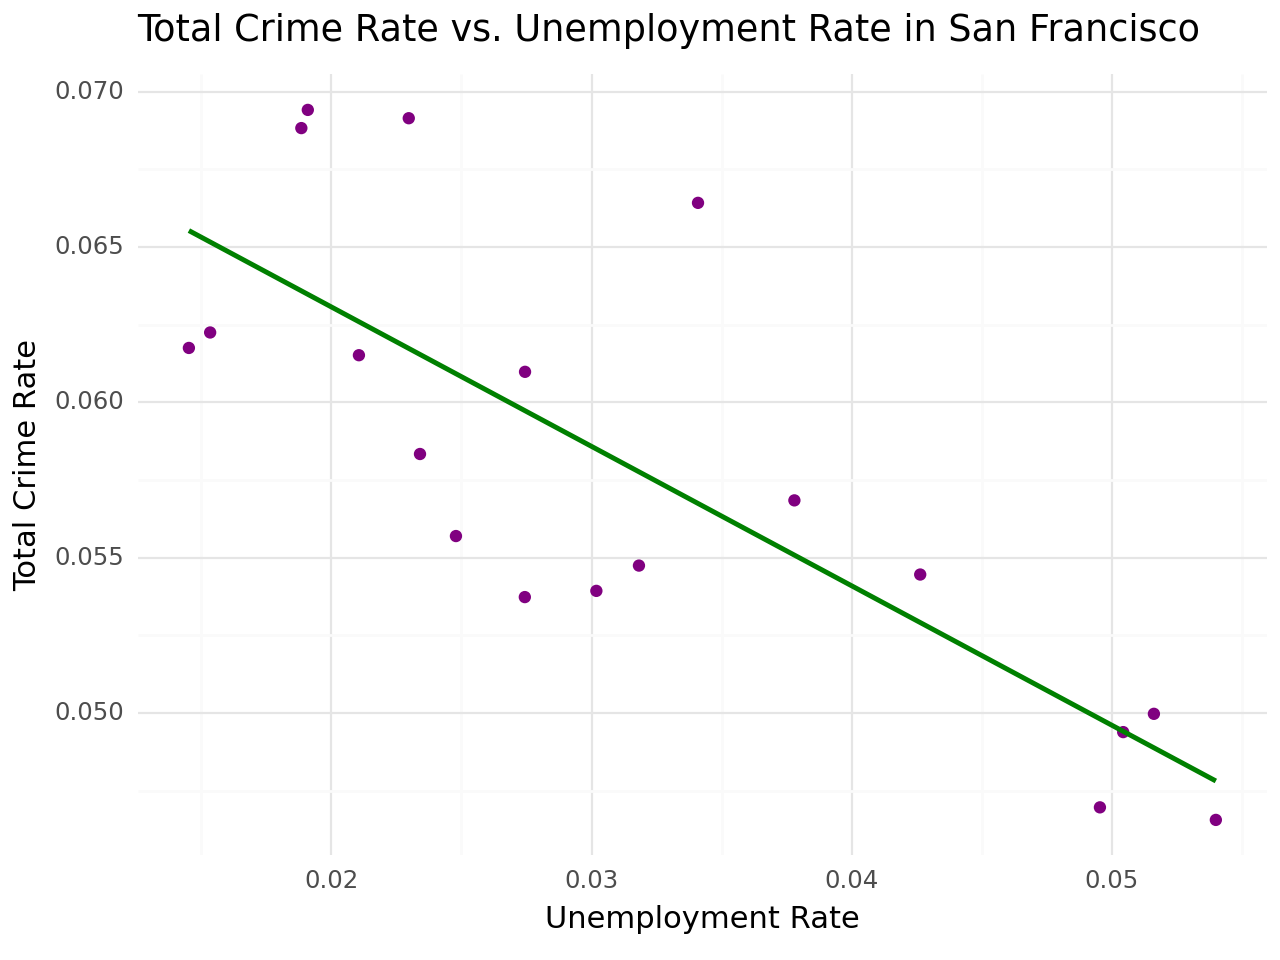

<Figure Size: (640 x 480)>

In [39]:
unemployment_graph_total = (
    p9.ggplot(sf_crime, p9.aes(x = "unemployment_rate", y = "total_rate")) + p9.geom_point(color = "purple")
    + p9.geom_smooth(method = "lm", se = False, color = "green") + p9.theme_minimal() +
    p9.labs(x = "Unemployment Rate",
            y = "Total Crime Rate",
            title = "Total Crime Rate vs. Unemployment Rate in San Francisco")
)
unemployment_graph_total

In [40]:
y_rate = sf_crime["unemployment_rate"].tolist()
x_violent = sm.add_constant(sf_crime["violent_rate"].tolist())
x_property = sm.add_constant(sf_crime["property_rate"].tolist())
x_total = sm.add_constant(sf_crime["total_rate"].tolist())

In [42]:
violent_regression = sm.OLS(y_rate, x_violent).fit()
print(violent_regression.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.096
Model:                            OLS   Adj. R-squared:                  0.043
Method:                 Least Squares   F-statistic:                     1.805
Date:                Sun, 17 Mar 2024   Prob (F-statistic):              0.197
Time:                        12:33:41   Log-Likelihood:                 57.295
No. Observations:                  19   AIC:                            -110.6
Df Residuals:                      17   BIC:                            -108.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0669      0.027      2.520      0.0

c:\Users\herob\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19


In [43]:
property_regression = sm.OLS(y_rate, x_property).fit()
print(property_regression.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.591
Model:                            OLS   Adj. R-squared:                  0.567
Method:                 Least Squares   F-statistic:                     24.60
Date:                Sun, 17 Mar 2024   Prob (F-statistic):           0.000119
Time:                        12:34:37   Log-Likelihood:                 64.837
No. Observations:                  19   AIC:                            -125.7
Df Residuals:                      17   BIC:                            -123.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1011      0.014      7.129      0.0

c:\Users\herob\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19


In [44]:
total_regression = sm.OLS(y_rate, x_total).fit()
print(total_regression.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.625
Model:                            OLS   Adj. R-squared:                  0.603
Method:                 Least Squares   F-statistic:                     28.38
Date:                Sun, 17 Mar 2024   Prob (F-statistic):           5.56e-05
Time:                        12:39:47   Log-Likelihood:                 65.663
No. Observations:                  19   AIC:                            -127.3
Df Residuals:                      17   BIC:                            -125.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1122      0.015      7.346      0.0

c:\Users\herob\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
